In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
train_base = "/kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"
train_cases = sorted([f for f in os.listdir(train_base) if f.startswith("BraTS")])


In [2]:
import nibabel as nib
shapes = []
for case in train_cases:
    img = nib.load(os.path.join(train_base, case, f"{case}-t2f.nii")).get_fdata()
    shapes.append(img.shape)


In [3]:
import numpy as np
from collections import Counter
counter = Counter()
for case in train_cases:
    mask = nib.load(os.path.join(train_base, case, f"{case}-seg.nii")).get_fdata()
    counter.update(np.unique(mask))


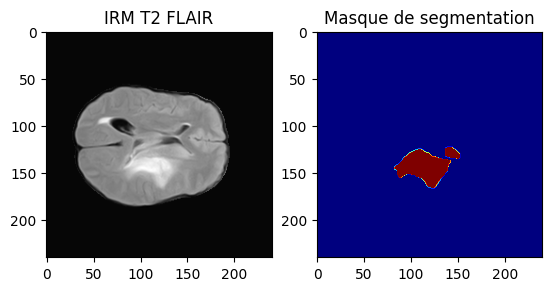

In [4]:
import matplotlib.pyplot as plt
img = nib.load(os.path.join(train_base, train_cases[0], f"{train_cases[0]}-t2f.nii")).get_fdata()
mask = nib.load(os.path.join(train_base, train_cases[0], f"{train_cases[0]}-seg.nii")).get_fdata()
slice_idx = img.shape[2] // 2

plt.subplot(1, 2, 1)
plt.imshow(img[:, :, slice_idx], cmap="gray")
plt.title("IRM T2 FLAIR")

plt.subplot(1, 2, 2)
plt.imshow(mask[:, :, slice_idx], cmap="jet")
plt.title("Masque de segmentation")
plt.show()


In [5]:
import pandas as pd
# But : confirmer homogénéité des tailles
shapes = [nib.load(f"{train_base}/{c}/{c}-t1c.nii").shape for c in train_cases]
pd.DataFrame(shapes, columns=["X", "Y", "Z"]).describe()


,X,Y,Z
count,60.0,60.0,60.0
mean,240.0,240.0,155.0
std,0.0,0.0,0.0
min,240.0,240.0,155.0
25%,240.0,240.0,155.0
50%,240.0,240.0,155.0
75%,240.0,240.0,155.0
max,240.0,240.0,155.0


In [6]:
base_path = "/kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"
train_cases = sorted([f for f in os.listdir(train_base) if f.startswith("BraTS")])


In [7]:
# But : analyser le déséquilibre de classes
from collections import Counter
import numpy as np

label_counter = Counter()
for case in train_cases:
    mask = nib.load(f"{base_path}/{case}/{case}-seg.nii").get_fdata()
    labels = np.unique(mask)
    label_counter.update(labels)

print(dict(label_counter))


{0.0: 60, 1.0: 55, 2.0: 60, 3.0: 60}


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Distribution des pixels par classe')

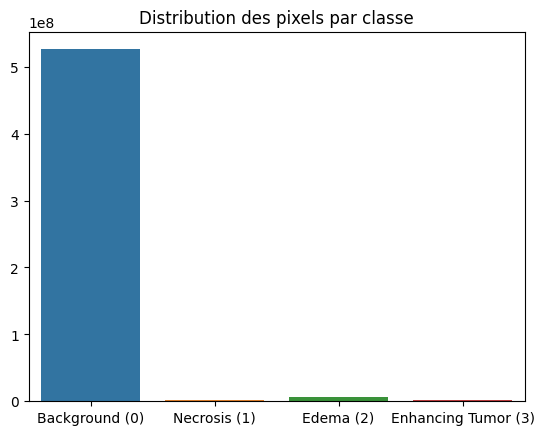

In [8]:
import seaborn as sns
pixel_counts = Counter()
for case in train_cases:
    mask = nib.load(f"{base_path}/{case}/{case}-seg.nii").get_fdata().astype(int)
    unique, counts = np.unique(mask, return_counts=True)
    pixel_counts.update(dict(zip(unique, counts)))

sns.barplot(x=["Background (0)", "Necrosis (1)", "Edema (2)", "Enhancing Tumor (3)"],
            y=[pixel_counts.get(i, 0) for i in range(4)])
plt.title("Distribution des pixels par classe")


In [9]:
presence_counter = {0: 0, 1: 0, 2: 0, 3: 0}
for case in train_cases:
    mask = nib.load(f"{base_path}/{case}/{case}-seg.nii").get_fdata()
    for label in range(4):
        if label in np.unique(mask):
            presence_counter[label] += 1
print("Présence de chaque classe dans les cas :", presence_counter)


Présence de chaque classe dans les cas : {0: 60, 1: 55, 2: 60, 3: 60}


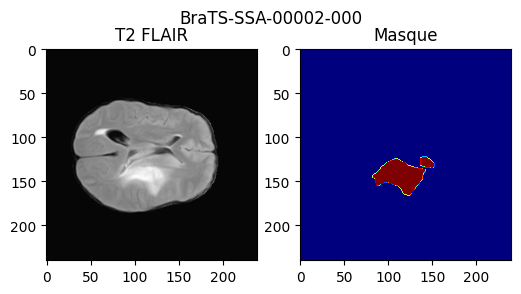

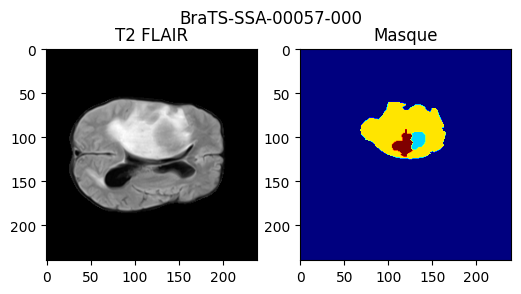

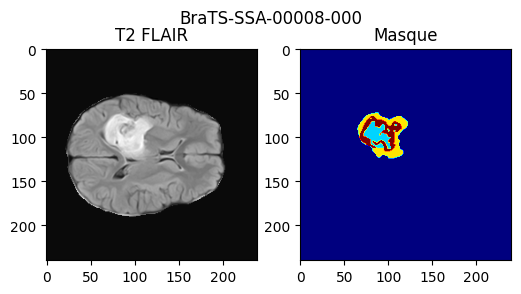

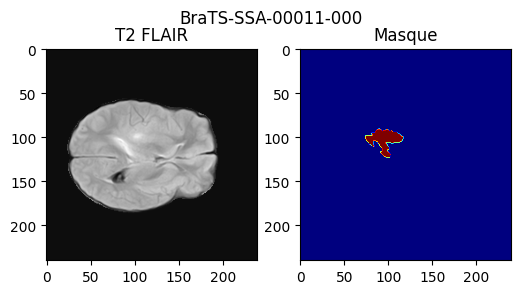

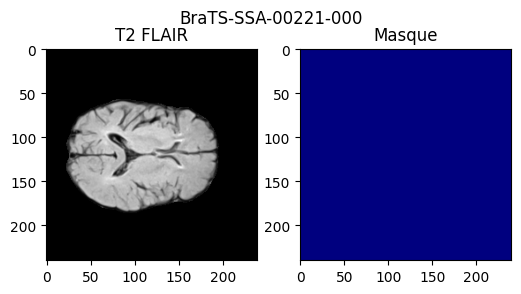

In [10]:
import random
sample_cases = random.sample(train_cases, 5)
for case in sample_cases:
    img = nib.load(f"{base_path}/{case}/{case}-t2f.nii").get_fdata()
    mask = nib.load(f"{base_path}/{case}/{case}-seg.nii").get_fdata()
    slice_idx = img.shape[2] // 2

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img[:, :, slice_idx], cmap='gray')
    plt.title("T2 FLAIR")
    plt.subplot(1, 2, 2)
    plt.imshow(mask[:, :, slice_idx], cmap='jet')
    plt.title("Masque")
    plt.suptitle(case)
    plt.show()


In [11]:
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjit

In [12]:
base_path = '/kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/'
case = 'BraTS-SSA-00002-000'
modalities = ['t1c', 't1n', 't2f', 't2w']

images = []
for mod in modalities:
    path = os.path.join(base_path, case, f"{case}-{mod}.nii")
    print("Loading:", path)  # debug
    img = nib.load(path).get_fdata()
    images.append(img)


Loading: /kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00002-000/BraTS-SSA-00002-000-t1c.nii
Loading: /kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00002-000/BraTS-SSA-00002-000-t1n.nii
Loading: /kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00002-000/BraTS-SSA-00002-000-t2f.nii
Loading: /kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00002-000/BraTS-SSA-00002-000-t2w.nii


In [13]:
cases = sorted([d for d in os.listdir(base_path) if d.startswith("BraTS")])

print(f"Nombre total de cas : {len(cases)}")
print("Exemples de cas :", cases[:5])


Nombre total de cas : 60
Exemples de cas : ['BraTS-SSA-00002-000', 'BraTS-SSA-00007-000', 'BraTS-SSA-00008-000', 'BraTS-SSA-00010-000', 'BraTS-SSA-00011-000']


In [14]:
# Chargement du masque de segmentation
mask_path = os.path.join(base_path, case, f"{case}-seg.nii")
mask = nib.load(mask_path).get_fdata()

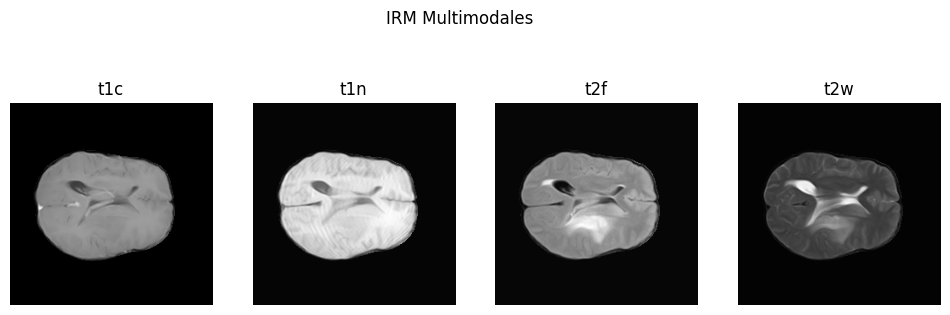

In [15]:
# Visualisation
slice_idx = images[0].shape[2] // 2
plt.figure(figsize=(12, 4))
for i, img in enumerate(images):
    plt.subplot(1, 4, i+1)
    plt.imshow(img[:, :, slice_idx], cmap='gray')
    plt.title(modalities[i])
    plt.axis('off')
plt.suptitle("IRM Multimodales")
plt.show()



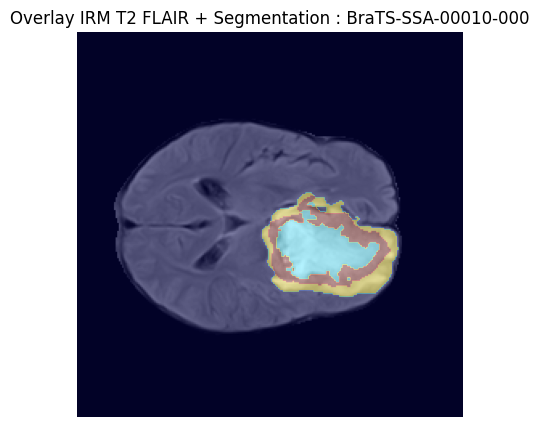

In [16]:
import matplotlib.pyplot as plt

sample_case = cases[3]  # n'importe quel cas
mod_path = os.path.join(base_path, sample_case, f"{sample_case}-t2f.nii")
mask_path = os.path.join(base_path, sample_case, f"{sample_case}-seg.nii")

img = nib.load(mod_path).get_fdata()
mask = nib.load(mask_path).get_fdata()

slice_index = img.shape[2] // 2

plt.figure(figsize=(10, 5))
plt.imshow(img[:, :, slice_index], cmap='gray')
plt.imshow(mask[:, :, slice_index], cmap='jet', alpha=0.3)
plt.title(f"Overlay IRM T2 FLAIR + Segmentation : {sample_case}")
plt.axis('off')
plt.show()


In [25]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import nibabel as nib
import numpy as np
from torchvision.transforms import Compose
import torchio as tio
import random

In [26]:
class BraTSDatasetPatch(Dataset):
    def __init__(self, root_dir, cases, crop_size=(128, 128, 64), transform=None):
        self.root_dir = root_dir
        self.cases = cases
        self.modalities = ['t1c', 't1n', 't2f', 't2w']
        self.crop_size = crop_size
        self.transform = transform

    def __len__(self):
        return len(self.cases)

    def __getitem__(self, idx):
        case = self.cases[idx]
        image, mask = [], None
        for mod in self.modalities:
            path = os.path.join(self.root_dir, case, f"{case}-{mod}.nii")
            img = nib.load(path).get_fdata().astype(np.float32)
            img = (img - img.mean()) / (img.std() + 1e-5)
            image.append(img)
        image = np.stack(image)

        mask_path = os.path.join(self.root_dir, case, f"{case}-seg.nii")
        mask = nib.load(mask_path).get_fdata().astype(np.uint8)
        mask = np.expand_dims(mask, axis=0)

        # Centrage sur la tumeur
        coords = np.argwhere(mask[0] > 0)
        if coords.size == 0:
            z, y, x = [s // 2 for s in mask.shape[1:]]
        else:
            z, y, x = coords[np.random.choice(len(coords))]

        dz, dy, dx = self.crop_size
        start_z = max(0, min(z - dz // 2, image.shape[1] - dz))
        start_y = max(0, min(y - dy // 2, image.shape[2] - dy))
        start_x = max(0, min(x - dx // 2, image.shape[3] - dx))

        image = image[:, start_z:start_z+dz, start_y:start_y+dy, start_x:start_x+dx]
        mask = mask[:, start_z:start_z+dz, start_y:start_y+dy, start_x:start_x+dx]

        if self.transform:
            subject = tio.Subject(
                image=tio.ScalarImage(tensor=torch.from_numpy(image.copy())),
                mask=tio.LabelMap(tensor=torch.from_numpy(mask.copy()))
            )
            augmented = self.transform(subject)
            image = augmented.image.tensor
            mask = augmented.mask.tensor
        else:
            image = torch.from_numpy(image.copy())
            mask = torch.from_numpy(mask.copy())

        return image.float(), mask.long()

In [27]:
# Modèle léger UNet3D
class ConvBlock3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)

In [28]:
class UNet3D(nn.Module):
    def __init__(self, in_channels=4, out_channels=4):
        super().__init__()
        self.enc1 = ConvBlock3D(in_channels, 16)
        self.pool1 = nn.MaxPool3d(2)
        self.enc2 = ConvBlock3D(16, 32)
        self.pool2 = nn.MaxPool3d(2)
        self.enc3 = ConvBlock3D(32, 64)
        self.pool3 = nn.MaxPool3d(2)

        self.bottleneck = ConvBlock3D(64, 128)

        self.up3 = nn.ConvTranspose3d(128, 64, kernel_size=2, stride=2)
        self.dec3 = ConvBlock3D(128, 64)
        self.up2 = nn.ConvTranspose3d(64, 32, kernel_size=2, stride=2)
        self.dec2 = ConvBlock3D(64, 32)
        self.up1 = nn.ConvTranspose3d(32, 16, kernel_size=2, stride=2)
        self.dec1 = ConvBlock3D(32, 16)

        self.out_conv = nn.Conv3d(16, out_channels, kernel_size=1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        e3 = self.enc3(self.pool2(e2))
        b = self.bottleneck(self.pool3(e3))

        d3 = self.up3(b)
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.dec3(d3)
        d2 = self.up2(d3)
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.dec2(d2)
        d1 = self.up1(d2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dec1(d1)

        return self.out_conv(d1)

In [29]:

# Affichage pour validation
import matplotlib.pyplot as plt
def show_prediction(x, mask, pred, slice_idx=None):
    x = x[0, 2]  # T2 FLAIR
    mask = mask[0]
    pred = pred[0]
    if slice_idx is None:
        slice_idx = pred.shape[1] // 2
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(x[:, :, slice_idx].cpu(), cmap='gray')
    plt.title("IRM FLAIR")
    plt.subplot(1, 3, 2)
    plt.imshow(mask[:, :, slice_idx].cpu(), cmap='jet')
    plt.title("Masque réel")
    plt.subplot(1, 3, 3)
    plt.imshow(pred[:, :, slice_idx], cmap='jet')
    plt.title("Masque prédit")
    plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch.nn.functional as F
import gc


In [31]:

# Split des cas
base_path = "/kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"
all_cases = sorted([d for d in os.listdir(base_path) if d.startswith("BraTS")])
train_cases, val_cases = train_test_split(all_cases, test_size=0.2, random_state=42)


In [32]:
# Data augmentation pour le train
transform = Compose([
    tio.RandomFlip(axes=('LR',), p=0.5),
    tio.RandomAffine(scales=0.1, degrees=10, translation=5, p=0.5),
])

In [33]:
# Datasets
train_dataset = BraTSDatasetPatch(base_path, train_cases, transform=transform)
val_dataset   = BraTSDatasetPatch(base_path, val_cases, transform=None)

In [34]:


# Loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=1, shuffle=False)


In [35]:
# Fonction de perte
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-5):
        super().__init__()
        self.smooth = smooth

    def forward(self, logits, targets):
        num_classes = logits.shape[1]
        probs = F.softmax(logits, dim=1)
        one_hot = F.one_hot(targets.squeeze(1), num_classes).permute(0, 4, 1, 2, 3).float()
        intersection = torch.sum(probs * one_hot, dim=(0, 2, 3, 4))
        union = torch.sum(probs + one_hot, dim=(0, 2, 3, 4))
        dice = (2. * intersection + self.smooth) / (union + self.smooth)
        return 1 - dice.mean()


In [40]:

# Entraînement
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet3D().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
best_loss = float('inf')

for epoch in range(1, 21):
    model.train()
    train_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = combined_loss(out, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        del x, y, out; gc.collect(); torch.cuda.empty_cache()

    print(f"Epoch {epoch} - Loss: {train_loss:.4f}")

    model.eval()
    dices = []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            dices.append(dice_score(out, y))
    dice_mean = np.mean(dices, axis=0)
    print(" Dice:", [f"{d:.3f}" for d in dice_mean])

    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), "best_model.pth")

Epoch 1 - Loss: 100.7848


NameError: name 'dice_score' is not defined

In [ ]:
import matplotlib.pyplot as plt
from torch.nn.functional import softmax

model.load_state_dict(torch.load("best_model.pth"))
model.eval()


In [13]:

# Choisir un sous-échantillon du jeu d'entraînement
sample_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Nombre de cas à afficher
nb_samples = 5
count = 0


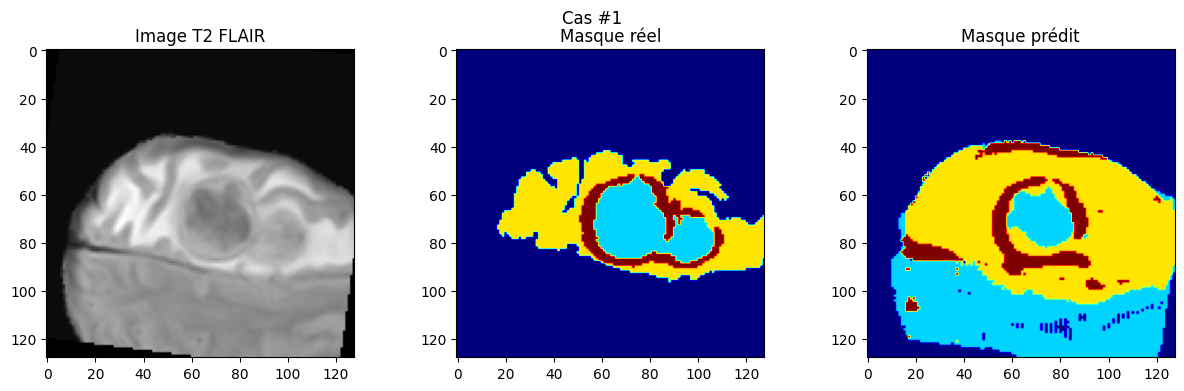

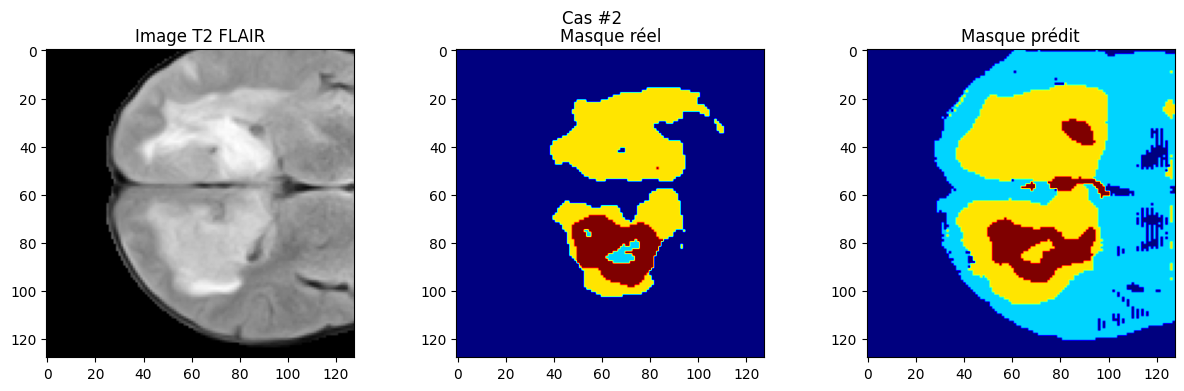

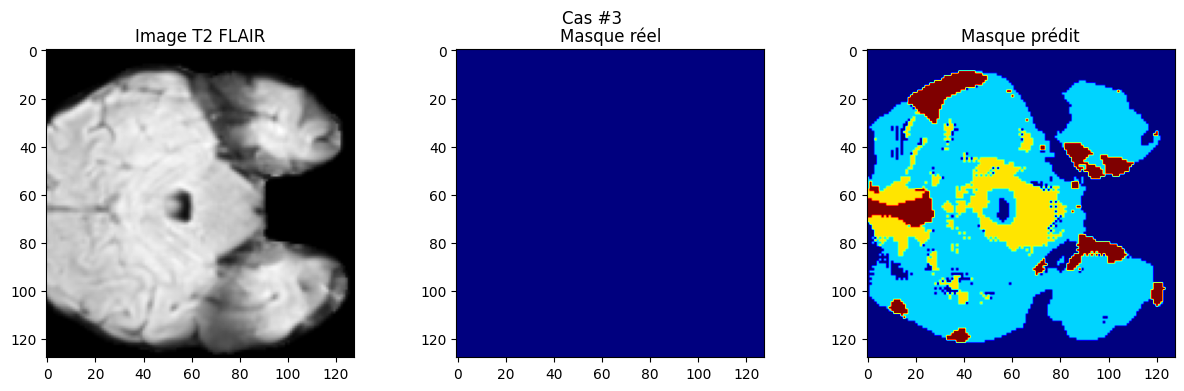

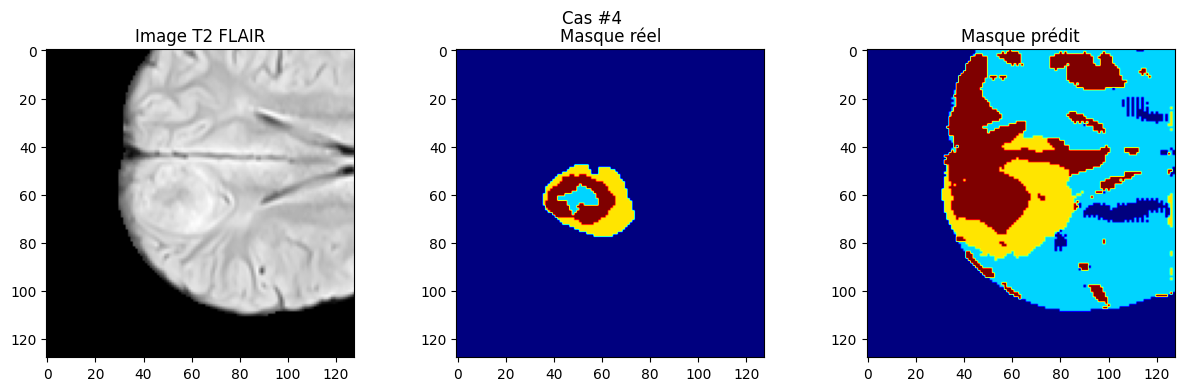

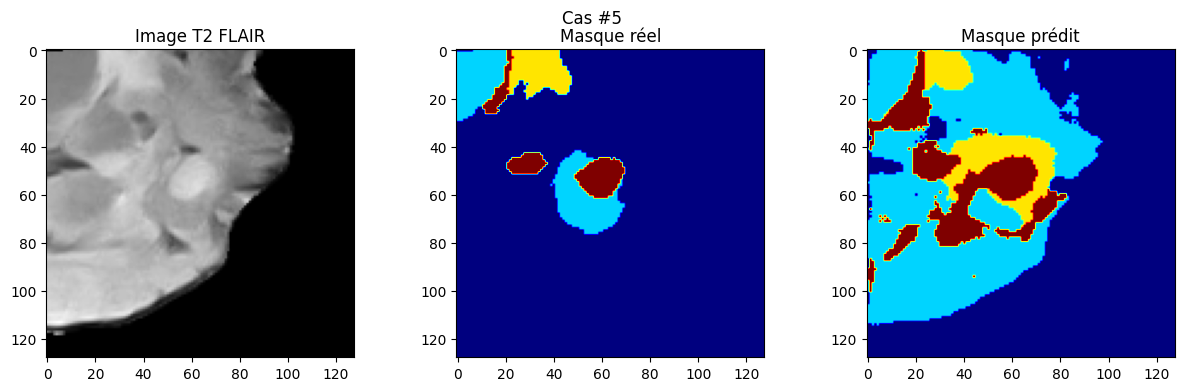

In [14]:

for x, y in sample_loader:
    x, y = x.to(device), y.to(device)
    with torch.no_grad():
        out = model(x)
        pred = torch.argmax(softmax(out, dim=1), dim=1)

    # Visualisation d'une coupe centrale
    flair = x[0, 2].cpu()
    mask = y[0, 0].cpu()
    pred = pred[0].cpu()

    z = flair.shape[2] // 2  

    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(flair[:, :, z], cmap='gray')
    plt.title("Image T2 FLAIR")

    plt.subplot(1, 3, 2)
    plt.imshow(mask[:, :, z], cmap='jet')
    plt.title("Masque réel")

    plt.subplot(1, 3, 3)
    plt.imshow(pred[:, :, z], cmap='jet')
    plt.title("Masque prédit")

    plt.suptitle(f"Cas #{count + 1}")
    plt.show()

    count += 1
    if count >= nb_samples:
        break


In [ ]:
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

def dice_per_class(preds, targets, num_classes=4):
    dice_scores = []
    preds = preds.flatten()
    targets = targets.flatten()
    for cls in range(num_classes):
        p = (preds == cls).astype(np.uint8)
        t = (targets == cls).astype(np.uint8)
        intersection = (p * t).sum()
        if p.sum() + t.sum() == 0:
            dice_scores.append(1.0)
        else:
            dice_scores.append(2. * intersection / (p.sum() + t.sum()))
    return dice_scores


In [ ]:
def iou_per_class(preds, targets, num_classes=4):
    ious = []
    preds = preds.flatten()
    targets = targets.flatten()
    for cls in range(num_classes):
        p = (preds == cls)
        t = (targets == cls)
        intersection = np.logical_and(p, t).sum()
        union = np.logical_or(p, t).sum()
        ious.append(intersection / union if union != 0 else 1.0)
    return ious

def pixel_accuracy(preds, targets):
    return (preds == targets).sum() / np.prod(targets.shape)

In [15]:




# Évaluation sur val_loader
model.eval()
dice_all = []
iou_all = []
acc_all = []

with torch.no_grad():
    for x, y in tqdm(val_loader):
        x, y = x.to(device), y.to(device)
        out = model(x)
        pred = torch.argmax(F.softmax(out, dim=1), dim=1)

        preds_np = pred.cpu().numpy()
        targets_np = y[:, 0].cpu().numpy()

        for p, t in zip(preds_np, targets_np):
            dice_all.append(dice_per_class(p, t))
            iou_all.append(iou_per_class(p, t))
            acc_all.append(pixel_accuracy(p, t))

# Moyennes
dice_mean = np.mean(dice_all, axis=0)
iou_mean = np.mean(iou_all, axis=0)
acc_mean = np.mean(acc_all)

# Affichage
for i, label in enumerate(["Background", "Necrosis", "Edema", "Enhancing Tumor"]):
    print(f"{label} - Dice: {dice_mean[i]:.3f} | IoU: {iou_mean[i]:.3f}")

print(f"\nPixel Accuracy globale : {acc_mean:.4f}")
print(f"Dice moyen global      : {np.mean(dice_mean):.4f}")
print(f"IoU moyen global       : {np.mean(iou_mean):.4f}")


100%|██████████| 12/12 [00:07<00:00,  1.68it/s]

Background - Dice: 0.720 | IoU: 0.571
Necrosis - Dice: 0.026 | IoU: 0.013
Edema - Dice: 0.561 | IoU: 0.409
Enhancing Tumor - Dice: 0.411 | IoU: 0.297

Pixel Accuracy globale : 0.5950
Dice moyen global      : 0.4296
IoU moyen global       : 0.3225


# **AMELIORATIONS**

In [42]:
import os
import random
import torch
import numpy as np
import nibabel as nib
from torch.utils.data import Dataset, DataLoader
import torchio as tio
import torch.nn.functional as F
from torchvision.transforms import Compose
import os
import nibabel as nib
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose
import torchio as tio
from tqdm import tqdm


In [43]:
def get_balanced_indices(cases, base_path):
    rare_class_cases = []
    normal_cases = []

    for c in cases:
        mask_path = os.path.join(base_path, c, f"{c}-seg.nii")
        mask = nib.load(mask_path).get_fdata()
        if 1 in np.unique(mask):  # présence de nécrose
            rare_class_cases.append(c)
        else:
            normal_cases.append(c)

    balanced = rare_class_cases * 3 + normal_cases  # pondération manuelle
    random.shuffle(balanced)
    return balanced


In [44]:
class BraTSDatasetPatch(Dataset):
    def __init__(self, root_dir, cases, crop_size=(128, 128, 64)):
        self.root_dir = root_dir
        self.cases = cases
        self.modalities = ['t1c', 't1n', 't2f', 't2w']
        self.crop_size = crop_size
        self.transform_rare = tio.Compose([
            tio.RandomFlip(axes=(0, 1, 2)),
            tio.RandomElasticDeformation(5, max_displacement=7.5, p=0.5),
            tio.RandomAffine(scales=(0.9, 1.1), degrees=10, translation=5, p=0.5),
            tio.RandomNoise(p=0.3)
        ])
        self.transform_normal = tio.Compose([
            tio.RandomFlip(axes=(0, 1, 2), p=0.5)
        ])

    def __len__(self):
        return len(self.cases)

    def __getitem__(self, idx):
        case = self.cases[idx]
        image, mask = [], None

        for mod in self.modalities:
            path = os.path.join(self.root_dir, case, f"{case}-{mod}.nii")
            img = nib.load(path).get_fdata().astype(np.float32)
            img = (img - img.mean()) / (img.std() + 1e-5)
            image.append(img)
        image = np.stack(image)

        mask_path = os.path.join(self.root_dir, case, f"{case}-seg.nii")
        mask = nib.load(mask_path).get_fdata().astype(np.uint8)
        mask = np.expand_dims(mask, axis=0)

        coords = np.argwhere(mask[0] > 0)
        if coords.size == 0:
            z, y, x = [s // 2 for s in mask.shape[1:]]
        else:
            z, y, x = coords[np.random.choice(len(coords))]

        dz, dy, dx = self.crop_size
        start_z = max(0, min(z - dz // 2, image.shape[1] - dz))
        start_y = max(0, min(y - dy // 2, image.shape[2] - dy))
        start_x = max(0, min(x - dx // 2, image.shape[3] - dx))

        image = image[:, start_z:start_z+dz, start_y:start_y+dy, start_x:start_x+dx]
        mask = mask[:, start_z:start_z+dz, start_y:start_y+dy, start_x:start_x+dx]

        # Transformation conditionnelle
        transform = self.transform_rare if 1 in mask else self.transform_normal
        subject = tio.Subject(
            image=tio.ScalarImage(tensor=torch.from_numpy(image.copy())),
            mask=tio.LabelMap(tensor=torch.from_numpy(mask.copy()))
        )
        augmented = transform(subject)
        image = augmented.image.tensor.float()
        mask = augmented.mask.tensor.long()

        return image, mask


In [45]:
from sklearn.model_selection import train_test_split

base_path = "/kaggle/input/brats-2023-challenge/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"
all_cases = sorted(os.listdir(base_path))
train_cases, val_cases = train_test_split(all_cases, test_size=0.2, random_state=42)

balanced_train_cases = get_balanced_indices(train_cases, base_path)

train_dataset = BraTSDatasetPatch(base_path, balanced_train_cases)
val_dataset = BraTSDatasetPatch(base_path, val_cases)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=2)


In [46]:
import torch.nn as nn

class ConvBlock3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv3d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)

In [47]:


class UNet3D(nn.Module):
    def __init__(self, in_channels=4, out_channels=4):
        super().__init__()
        self.enc1 = ConvBlock3D(in_channels, 16)
        self.pool1 = nn.MaxPool3d(2)
        self.enc2 = ConvBlock3D(16, 32)
        self.pool2 = nn.MaxPool3d(2)
        self.enc3 = ConvBlock3D(32, 64)
        self.pool3 = nn.MaxPool3d(2)

        self.bottleneck = ConvBlock3D(64, 128)

        self.up3 = nn.ConvTranspose3d(128, 64, 2, 2)
        self.dec3 = ConvBlock3D(128, 64)
        self.up2 = nn.ConvTranspose3d(64, 32, 2, 2)
        self.dec2 = ConvBlock3D(64, 32)
        self.up1 = nn.ConvTranspose3d(32, 16, 2, 2)
        self.dec1 = ConvBlock3D(32, 16)

        self.out_conv = nn.Conv3d(16, out_channels, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        e3 = self.enc3(self.pool2(e2))
        b = self.bottleneck(self.pool3(e3))
        d3 = self.dec3(torch.cat([self.up3(b), e3], dim=1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        return self.out_conv(d1)


In [48]:
import torch.nn.functional as F

def dice_loss(pred, target, smooth=1.):
    pred = F.softmax(pred, dim=1)
    target_one_hot = F.one_hot(target.squeeze(1), num_classes=4).permute(0, 4, 1, 2, 3).float()
    intersection = (pred * target_one_hot).sum(dim=(2, 3, 4))
    union = pred.sum(dim=(2, 3, 4)) + target_one_hot.sum(dim=(2, 3, 4))
    dice = (2 * intersection + smooth) / (union + smooth)
    return 1 - dice.mean()

In [49]:


def combined_loss(pred, target):
    ce = F.cross_entropy(pred, target.squeeze(1), weight=torch.tensor([0.2, 0.8, 0.5, 0.6]).to(pred.device))
    dsc = dice_loss(pred, target)
    return ce + dsc


In [ ]:
import gc
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet3D().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
best_loss = float('inf')

for epoch in range(1, 21):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = combined_loss(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        del x, y, out; gc.collect(); torch.cuda.empty_cache()

    print(f"Epoch {epoch} - Loss: {total_loss:.4f}")
    if total_loss < best_loss:
        best_loss = total_loss
        torch.save(model.state_dict(), "best_model.pth")


100%|██████████| 136/136 [05:00<00:00,  2.21s/it]


Epoch 1 - Loss: 263.7181


100%|██████████| 136/136 [05:18<00:00,  2.34s/it]


Epoch 2 - Loss: 229.7480


100%|██████████| 136/136 [05:20<00:00,  2.36s/it]


Epoch 3 - Loss: 212.9663


100%|██████████| 136/136 [05:00<00:00,  2.21s/it]


Epoch 4 - Loss: 201.8184


100%|██████████| 136/136 [04:55<00:00,  2.17s/it]


Epoch 5 - Loss: 189.0862


100%|██████████| 136/136 [05:15<00:00,  2.32s/it]


Epoch 6 - Loss: 177.7896


100%|██████████| 136/136 [05:36<00:00,  2.48s/it]


Epoch 7 - Loss: 164.2318


100%|██████████| 136/136 [04:59<00:00,  2.21s/it]


Epoch 8 - Loss: 155.0793


100%|██████████| 136/136 [04:48<00:00,  2.12s/it]


Epoch 9 - Loss: 147.6478


 17%|█▋        | 23/136 [01:03<05:54,  3.14s/it]

In [ ]:
from sklearn.metrics import confusion_matrix

def dice_iou(pred, target, num_classes=4):
    pred = torch.argmax(F.softmax(pred, dim=1), dim=1)
    target = target.squeeze(1)
    dices, ious = [], []
    for cls in range(num_classes):
        pred_cls = (pred == cls)
        target_cls = (target == cls)
        intersection = (pred_cls & target_cls).sum().item()
        union = (pred_cls | target_cls).sum().item()
        dice = (2 * intersection) / (pred_cls.sum().item() + target_cls.sum().item() + 1e-5)
        iou = intersection / (union + 1e-5)
        dices.append(dice)
        ious.append(iou)
    return dices, ious

In [ ]:
import matplotlib.pyplot as plt

model.load_state_dict(torch.load("/kaggle/input/newtest/best_model.pth"))
model.eval()

In [ ]:


with torch.no_grad():
    x, y = next(iter(val_loader))
    x, y = x.to(device), y.to(device)
    out = model(x)
    pred = torch.argmax(F.softmax(out, dim=1), dim=1)

In [ ]:
# Correction : slice sur l'axe de profondeur (Z)
depth = pred.shape[-1]  # axe Z
slice_idx = depth // 2

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(x[0, 2, :, :, slice_idx].cpu(), cmap='gray')  # FLAIR
plt.title("FLAIR")
plt.subplot(1, 3, 2)
plt.imshow(y[0, 0, :, :, slice_idx].cpu(), cmap='jet')
plt.title("Masque réel")
plt.subplot(1, 3, 3)
plt.imshow(pred[0, :, :, slice_idx].cpu(), cmap='jet')
plt.title("Prédiction")
plt.show()


In [ ]:

val_base_path = "/kaggle/input/brats-2023-challenge/BraTS2024-SSA-Challenge-ValidationData/BraTS2024-SSA-Challenge-ValidationData"
val_cases = sorted(os.listdir(val_base_path))

class BraTSValidationDataset(Dataset):
    def __init__(self, root_dir, cases):
        self.root_dir = root_dir
        self.cases = cases
        self.modalities = ['t1c', 't1n', 't2f', 't2w']

    def __len__(self):
        return len(self.cases)

    def __getitem__(self, idx):
        case = self.cases[idx]
        try:
            image = []
            for mod in self.modalities:
                img_path = os.path.join(self.root_dir, case, f"{case}-{mod}.nii")
                img = nib.load(img_path).get_fdata().astype(np.float32)
                img = (img - img.mean()) / (img.std() + 1e-5)
                image.append(img)
            image = np.stack(image)
            mask_path = os.path.join(self.root_dir, case, f"{case}-seg.nii")
            mask = nib.load(mask_path).get_fdata().astype(np.uint8)
            mask = np.expand_dims(mask, axis=0)

            return torch.from_numpy(image).float(), torch.from_numpy(mask).long()
        except Exception as e:
            print(f"Erreur chargement {case} : {e}")
            return None



In [ ]:
def dice_score(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum().float()
    return (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

In [ ]:


def iou_score(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum().float()
    union = pred.sum() + target.sum() - intersection
    return (intersection + smooth) / (union + smooth)


In [ ]:
val_dataset = BraTSValidationDataset(val_base_path, val_cases)
val_loader = DataLoader(val_dataset, batch_size=1)

model.load_state_dict(torch.load("best_model.pth"))
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

class_names = ["Background", "Necrosis", "Edema", "Enhancing Tumor"]
dice_scores = {i: [] for i in range(4)}
iou_scores = {i: [] for i in range(4)}
total_correct = 0
total_pixels = 0

with torch.no_grad():
    for x, y in tqdm(val_loader):
        x, y = x.to(device), y.to(device)
        out = model(x)
        pred = torch.argmax(torch.softmax(out, dim=1), dim=1)

        for cls in range(4):
            pred_cls = (pred == cls).float()
            target_cls = (y[:, 0] == cls).float()
            dice = dice_score(pred_cls, target_cls)
            iou = iou_score(pred_cls, target_cls)
            dice_scores[cls].append(dice.item())
            iou_scores[cls].append(iou.item())

        total_correct += (pred == y[:, 0]).sum().item()
        total_pixels += torch.numel(pred)

# Résultats
print("\n Évaluation sur BraTS2024 SSA")
for i in range(4):
    print(f"{class_names[i]} - Dice: {np.mean(dice_scores[i]):.3f} | IoU: {np.mean(iou_scores[i]):.3f}")

dices, ious = dice_iou(out, y)
print("\n Dice par classe :", dices)
print("IoU par classe :", ious)


In [ ]:
dices, ious = dice_iou(out, y)
print("\n Dice par classe :", dices)
print(" IoU par classe :", ious)


In [ ]:
class BraTSSubmissionDataset(Dataset):
    def __init__(self, base_path, cases, crop_size=(128, 128, 64)):
        self.base_path = base_path
        self.cases = cases
        self.crop_size = crop_size
        self.modalities = ['t1c', 't1n', 't2f', 't2w']

    def __len__(self):
        return len(self.cases)

    def __getitem__(self, idx):
        case = self.cases[idx]
        image = []
        for mod in self.modalities:
            img_path = os.path.join(self.base_path, case, f"{case}-{mod}.nii")
            img = nib.load(img_path).get_fdata().astype(np.float32)
            img = (img - img.mean()) / (img.std() + 1e-5)
            image.append(img)
        image = np.stack(image)

        # Centrage (milieu du volume si pas de masque)
        z, y, x = [s // 2 for s in image.shape[1:]]
        dz, dy, dx = self.crop_size
        start_z = max(0, min(z - dz // 2, image.shape[1] - dz))
        start_y = max(0, min(y - dy // 2, image.shape[2] - dy))
        start_x = max(0, min(x - dx // 2, image.shape[3] - dx))

        image = image[:, start_z:start_z+dz, start_y:start_y+dy, start_x:start_x+dx]
        image = torch.from_numpy(image).float()

        return image, case


In [ ]:
submission_dataset = BraTSSubmissionDataset(val_base_path, val_cases)
submission_loader = DataLoader(submission_dataset, batch_size=1)

output_dir = "submission"
os.makedirs(output_dir, exist_ok=True)

In [ ]:


model.load_state_dict(torch.load("/kaggle/input/newtest/best_model.pth", map_location=device))
model.eval()
model.to(device)

for x, case_id in tqdm(submission_loader):
    x = x.to(device)
    with torch.no_grad():
        output = model(x)
        pred = torch.argmax(torch.softmax(output, dim=1), dim=1).squeeze(0).cpu().numpy().astype(np.uint8)

    # Chargement affine depuis t1c
    affine = nib.load(os.path.join(val_base_path, case_id[0], f"{case_id[0]}-t1c.nii")).affine
    nib.save(nib.Nifti1Image(pred, affine), os.path.join(output_dir, f"{case_id[0]}-seg.nii.gz"))

print(" Soumission générée avec succès.")


In [ ]:
import shutil

shutil.make_archive('/kaggle/working/submission', 'zip', '/kaggle/working/submission')
print("Dossier compressé : submission.zip")

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

In [ ]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

num_visualizations = 5  
val_iter = iter(val_loader)


In [ ]:

for i in range(num_visualizations):
    with torch.no_grad():
        x, y = next(val_iter)
        x, y = x.to(device), y.to(device)
        out = model(x)
        pred = torch.argmax(F.softmax(out, dim=1), dim=1)

    slice_idx = pred.shape[-1] // 2  # axe Z au centre

    plt.figure(figsize=(12, 4))
    plt.suptitle(f"Exemple {i+1}", fontsize=14)

    plt.subplot(1, 3, 1)
    plt.imshow(x[0, 2, :, :, slice_idx].cpu(), cmap='gray')  # FLAIR
    plt.title("FLAIR")

    plt.subplot(1, 3, 2)
    plt.imshow(y[0, 0, :, :, slice_idx].cpu(), cmap='jet')
    plt.title("Masque réel")

    plt.subplot(1, 3, 3)
    plt.imshow(pred[0, :, :, slice_idx].cpu(), cmap='jet')
    plt.title("Prédiction")

    plt.show()
